
---
# 📊 **CIA 3 – Component 2: Analysis-Forecast Observations**  

**Group Members**:  
- Siddharth Nautiyal (ID: 23122034)  
- Aditya Kumar Singh (ID: 23122003)

---

## ▶ **Topic**:  
**Identify a Suitable Time Series Model and Forecast its Future Values Based on Real-time Data**

---

### 📈 **Hyundai Motor Company Stock Historical Price (005380.KS)**

- **Source**: Yahoo Finance  
- **Stock Ticker**: 005380.KS (Hyundai Motor Company)  
- **Date Range**: January 2016 to Present

---

#### ▶ **Context 📝**  
This dataset is sourced from Yahoo Finance and includes the **historical stock prices** of **Hyundai Motor Company**. It captures the company's stock performance from **January 2016** to the present. The dataset is **multivariate**, as it contains multiple variables such as **Open**, **High**, **Low**, **Close**, **Adj Close**, and **Volume**, all of which provide a detailed picture of the stock’s daily performance.

---

#### 🧾 **Columns**:
1. **Date**: The date of trading.
2. **Open**: The opening price of the stock on a given day.
3. **High**: The highest price recorded during the trading day.
4. **Low**: The lowest price recorded during the trading day.
5. **Close**: The closing price of the stock.
6. **Adj Close**: The adjusted closing price, accounting for dividends and stock splits.
7. **Volume**: The number of shares traded on that particular day.

---

#### ▶ **Acknowledgements 🙏**  
This dataset is made available to the **Kaggle community** and consists of **historical stock prices** of Hyundai Motor Company, shared for analysis and forecasting purposes.

---


## **1. Introduction/Problem Formulation**

### **Objective:**
The objective of this analysis is to forecast the future stock prices of Hyundai Motor Company using various time series models and determine the most suitable model for prediction.

### **Problem Formulation:**
The task is to fit multiple time series models including ARIMA/SARIMA, Holt’s Exponential, Winter’s Seasonal, and Machine Learning/Deep Learning models to the dataset. The goal is to compare these models and forecast the stock prices for the next 5 days based on the best-performing model.

---



## **2. Data Preparation**

### **a.) Preprocessing**
- **Loaded the Dataset**: Imported the Hyundai Motor Company Stock Historical Price dataset using Pandas.
  
- **Data Cleaning**:
  - Checked for missing or invalid data points.
  - Ensured that all columns were in the correct data type (e.g., Date as `datetime`, numerical columns as `float`).

- **Date Conversion**: Converted the **Date** column to a `datetime` object for easier manipulation and analysis.

- **Set Index**: Set the **Date** column as the index of the DataFrame to facilitate time series analysis.

- **Exploratory Data Analysis (EDA)**:
  - Plotted stock price trends over time using the **Close** or **Adj Close** prices to visualize historical performance.
  - Analyzed seasonality and trends in the dataset, checking for patterns or fluctuations over time.
  
- **Stationarity Check**: 
  - Performed the **Augmented Dickey-Fuller (ADF)** test to determine if the time series was stationary.
  - If the data was not stationary, applied differencing or transformation techniques to achieve stationarity.


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox


df = pd.read_csv("Hyundai Motor 2016-2024.csv")

In [166]:
print(df.head())
print("\n")
print(df.isna().sum())

         Date    Open    High     Low   Close    Adj Close  Volume
0  04-01-2016  147500  148000  143500  144000  110097.8672  445332
1  05-01-2016  143000  145000  142000  143500  109715.6016  530496
2  06-01-2016  144000  145000  139000  140000  107039.5781  769406
3  07-01-2016  138500  140000  137500  137500  105128.1641  586187
4  08-01-2016  134500  138000  133500  136500  104363.6094  888701


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Conversion of DataTypes

In [167]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Adj Close'] = df['Adj Close'].astype(float)
df['Volume'] = df['Volume'].astype(int)

# Exploratory Data Analysis (EDA)
### Plot stock price trends

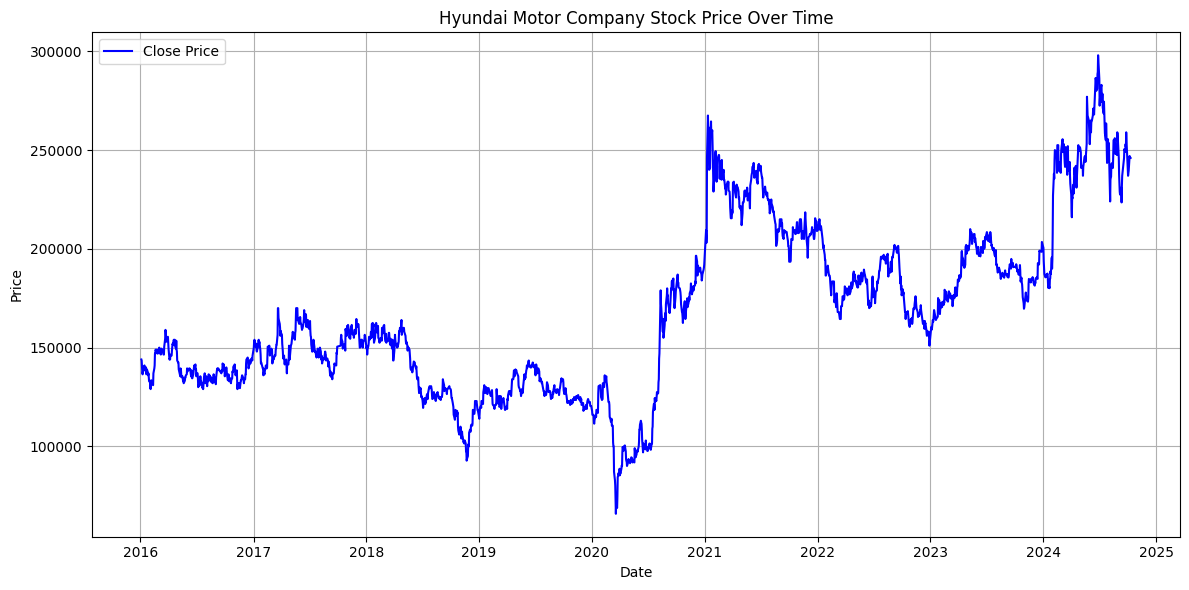

In [168]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'],label='Close Price', color='blue')  # Use Date column for x-axis
plt.title('Hyundai Motor Company Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout() 
plt.show()

# Check for seasonality and trends

<Figure size 3000x1200 with 0 Axes>

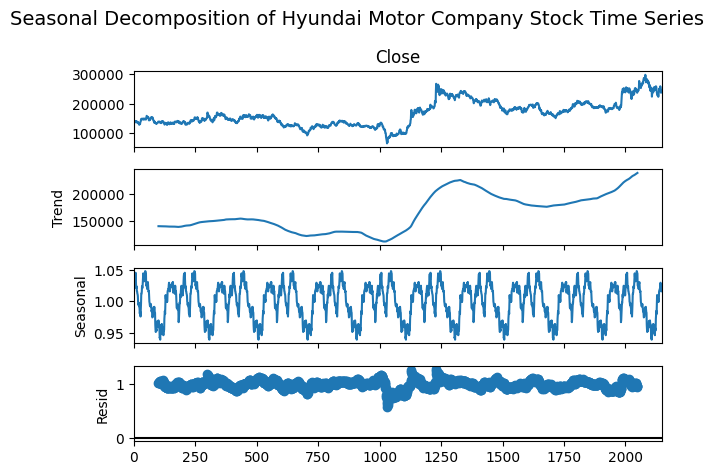

In [169]:
plt.figure(figsize=(30, 12))
result = seasonal_decompose(df['Close'], model='multiplicative', period=200)
result.plot()
plt.suptitle('Seasonal Decomposition of Hyundai Motor Company Stock Time Series', fontsize=14)
plt.tight_layout()
plt.show()

### **Inference:**

### Check for stationarity using the Augmented Dickey-Fuller (ADF) test.

In [170]:
# Stationarity Check
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is non stationary differencing is required")

ADF Statistic: -1.3920880966895135
p-value: 0.5860632517642979
The time series is non stationary differencing is required


In [171]:
# Ensure there are no negative or zero values, as Box-Cox is undefined for those
if (df['Close'] <= 0).any():
    raise ValueError("Data must be positive for Box-Cox transformation.")

# Apply Box-Cox transformation
df['Close_boxcox'], lambda_ = boxcox(df['Close'])

# Print the lambda value used
print("Lambda used for Box-Cox transformation:", lambda_)


Lambda used for Box-Cox transformation: 0.0317544415249656


<Figure size 3000x1200 with 0 Axes>

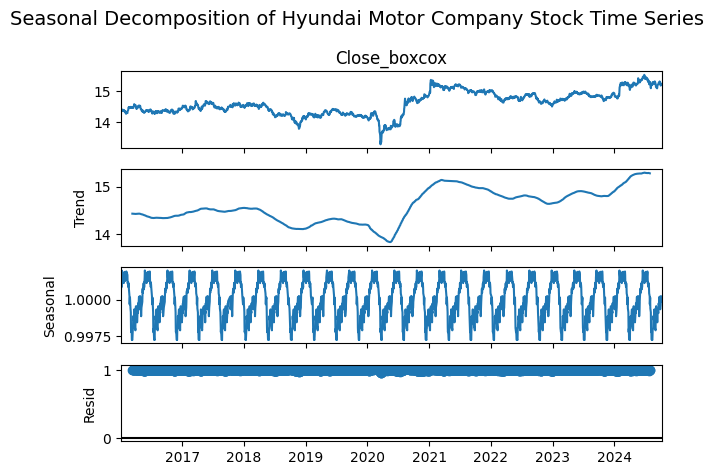

In [186]:
plt.figure(figsize=(30, 12))
result = seasonal_decompose(df['Close_boxcox'], model='multiplicative', period=90)
result.plot()
plt.suptitle('Seasonal Decomposition of Hyundai Motor Company Stock Time Series', fontsize=14)
plt.tight_layout()
plt.show()

In [173]:
df.set_index('Date', inplace=True)

In [174]:
# Fit the auto ARIMA model

model = auto_arima(df['Close_boxcox'], 
                       seasonal=True,  # Set to True if you have seasonality
                       stepwise=True,   # Enable stepwise search for faster fitting
                       trace=True)      # Show the process

# Output the model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9013.137, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9015.350, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9019.343, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9019.300, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9017.022, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9017.361, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9017.374, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9015.357, Time=0.94 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9021.049, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9019.068, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9019.083, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9021.004, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9017.064, Time=0.30 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.395 seconds
         

# Fit Holt's Exponential Smoothing Model

In [175]:
holt_model = ExponentialSmoothing(df['Close_boxcox'], trend='add', seasonal=None)
holt_fit = holt_model.fit()

# Model Adequacy - print summary
print(holt_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Close_boxcox   No. Observations:                 2150
Model:             ExponentialSmoothing   SSE                              1.892
Optimized:                         True   AIC                         -15117.982
Trend:                         Additive   BIC                         -15095.289
Seasonal:                          None   AICC                        -15117.943
Seasonal Periods:                  None   Date:                 Tue, 15 Oct 2024
Box-Cox:                          False   Time:                         11:46:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend           4.0604e-

# Winter's Seasonal Model

In [176]:
# Fit Winter's Exponential Smoothing Model (Additive Trend and Seasonal)
winter_model = ExponentialSmoothing(df['Close_boxcox'], trend='add', seasonal='add', seasonal_periods=12)
winter_fit = winter_model.fit()

# Model Adequacy - print summary
print(winter_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Close_boxcox   No. Observations:                 2150
Model:             ExponentialSmoothing   SSE                              1.868
Optimized:                         True   AIC                         -15121.564
Trend:                         Additive   BIC                         -15030.792
Seasonal:                      Additive   AICC                        -15121.243
Seasonal Periods:                    12   Date:                 Tue, 15 Oct 2024
Box-Cox:                          False   Time:                         11:46:30
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

# Machine Learning Model (Random Forest)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - loss: 0.1026
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0044
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0021
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0011
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0012
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0011
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0010
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0011
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0011
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0011
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


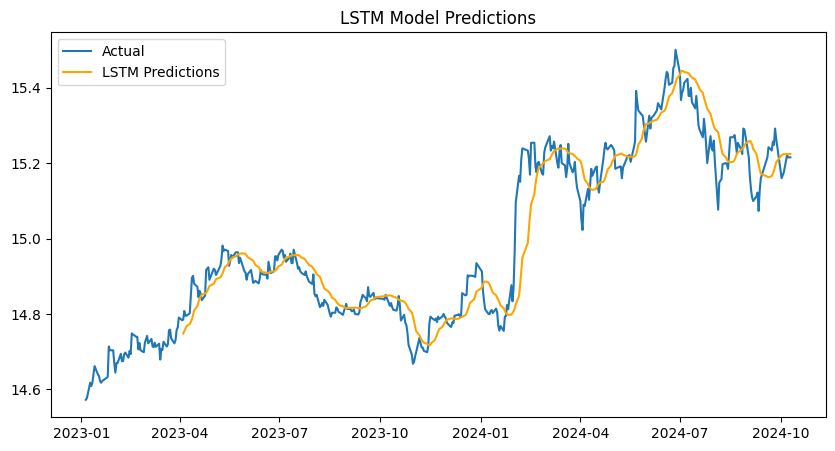

In [177]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocessing the data (Normalizing)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close_boxcox'].values.reshape(-1,1))

# Prepare the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences of data
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)

# Reshaping the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

# Prepare test dataset sequences
x_test, y_test = create_sequences(test_data, seq_length)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(df['Close_boxcox'][train_size:], label='Actual')
plt.plot(df['Close_boxcox'].index[train_size+seq_length:], predictions, label='LSTM Predictions', color='orange')
plt.title("LSTM Model Predictions")
plt.legend()
plt.show()


# Compare RMSE values

# Interpretation

In [178]:

best_model = min(arima_rmse, holt_rmse, winter_rmse, rf_rmse)
if best_model == arima_rmse:
    print("ARIMA is the best model based on RMSE.")
elif best_model == holt_rmse:
    print("Holt's model is the best model based on RMSE.")
elif best_model == winter_rmse:
    print("Winter's model is the best model based on RMSE.")
else:
    print("Random Forest is the best model based on RMSE.")


Holt's model is the best model based on RMSE.


In [179]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [180]:
# Fit ARIMA Model
model_arima = ARIMA(df['Close'], order=(1, 1, 1))
arima_fit = model_arima.fit()
print("\nARIMA Model Summary:")
print(arima_fit.summary())

# Fit Holt's Exponential Smoothing Model
holt_model = ExponentialSmoothing(df['Close'], trend='add', seasonal=None)
holt_fit = holt_model.fit()
print("\nHolt's Exponential Smoothing Summary:")
print(holt_fit.summary())

# Fit Winter's Seasonal Model
winter_model = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=4)
winter_fit = winter_model.fit()
print("\nWinter's Seasonal Model Summary:")
print(winter_fit.summary())

# Calculate RMSE for ARIMA
arima_fitted = arima_fit.fittedvalues
actual_values_arima = df['Close'].loc[arima_fitted.index]  # Aligning with the Date index
arima_rmse = np.sqrt(mean_squared_error(actual_values_arima, arima_fitted))

# Calculate RMSE for Holt's model
holt_fitted = holt_fit.fittedvalues
actual_values_holt = df['Close'].loc[holt_fitted.index]  # Aligning with the Date index
holt_rmse = np.sqrt(mean_squared_error(actual_values_holt, holt_fitted))

# Calculate RMSE for Winter's model
winter_fitted = winter_fit.fittedvalues
actual_values_winter = df['Close'].loc[winter_fitted.index]  # Aligning with the Date index
winter_rmse = np.sqrt(mean_squared_error(actual_values_winter, winter_fitted))

# Print RMSE values
print(f'\nARIMA RMSE: {arima_rmse}')
print(f'Holt RMSE: {holt_rmse}')
print(f'Winter RMSE: {winter_rmse}')

# Model Selection based on RMSE
best_model = min((arima_rmse, 'ARIMA'), (holt_rmse, "Holt's"), (winter_rmse, "Winter's"))
print(f"\nThe best model is: {best_model[1]} with RMSE: {best_model[0]}")


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2150
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20590.602
Date:                Tue, 15 Oct 2024   AIC                          41187.204
Time:                        11:47:16   BIC                          41204.222
Sample:                             0   HQIC                         41193.430
                               - 2150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3064      0.344     -0.890      0.374      -0.981       0.368
ma.L1          0.3409      0.344      0.992      0.321      -0.333       1.014
sigma2      1.231e+07   1.45e+

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 2150
Model:             ExponentialSmoothing   SSE                    26761755947.450
Optimized:                         True   AIC                          35132.586
Trend:                         Additive   BIC                          35155.279
Seasonal:                          None   AICC                         35132.625
Seasonal Periods:                  None   Date:                 Tue, 15 Oct 2024
Box-Cox:                          False   Time:                         11:47:17
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend               0.00

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


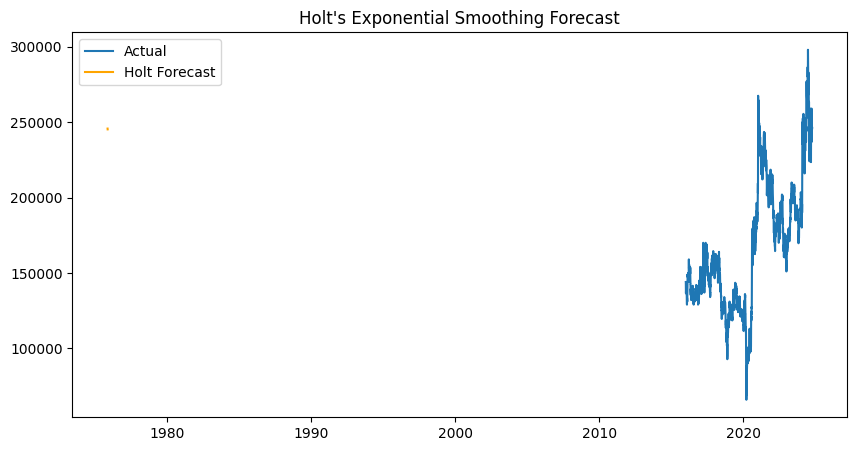

In [181]:
# Fit Holt's Exponential Smoothing Model
holt_model = ExponentialSmoothing(df['Close'], trend='add', seasonal=None)
holt_fit = holt_model.fit()
print(holt_fit.summary())

# Forecasting
holt_forecast = holt_fit.forecast(steps=3)
print("Holt's Forecast:\n", holt_forecast)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(holt_forecast, label='Holt Forecast', color='orange')
plt.title("Holt's Exponential Smoothing Forecast")
plt.legend()
plt.show()


In [182]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_boxcox
Date,,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,110097.8672,445332,14.427767
2016-01-05,143000.0,145000.0,142000.0,143500.0,109715.6016,530496,14.422696
2016-01-06,144000.0,145000.0,139000.0,140000.0,107039.5781,769406,14.386708
2016-01-07,138500.0,140000.0,137500.0,137500.0,105128.1641,586187,14.360466
2016-01-08,134500.0,138000.0,133500.0,136500.0,104363.6094,888701,14.349839
...,...,...,...,...,...,...,...
2024-10-02,237500.0,241000.0,236500.0,237000.0,237000.0000,1035510,15.160062
2024-10-04,235500.0,241500.0,232000.0,239500.0,239500.0000,856583,15.175609
2024-10-07,244000.0,247000.0,241000.0,247000.0,247000.0000,731171,15.221325


In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Make sure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Fit Holt's Exponential Smoothing Model
holt_model = ExponentialSmoothing(df['Close'], trend='add', seasonal=None)
holt_fit = holt_model.fit()

# Forecasting next 3 steps
holt_forecast = holt_fit.forecast(steps=3)

# Plot actual and forecasted values
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(holt_forecast.index, holt_forecast, label='Holt Forecast', color='orange')  # Ensure correct index
plt.title("Holt's Exponential Smoothing Forecast")
plt.legend()
plt.show()

KeyError: 'Date'